Market Segmentation 

IMPORT LIBRARIES AND DATASETS
# This need to execute in tensor flow environment 
Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os
import warnings
warnings.filterwarnings('ignore')


Read Sales Data, display top 5 records

In [3]:
creditcard_df = pd.read_csv("C:\\Users\\Asus\\Desktop\\Data Science\\TOPMENTOR-DS\\Capstone_project\\Projects\\Project -5 Marketting Department\\Marketing_data.csv")
display (creditcard_df )

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

Data Set Details - Info

In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Data Set Details – Describe

In [6]:
creditcard_df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

Customer with maximum 'ONEOFF_PURCHASES' 

In [8]:
# Check who made one off purchase of $40761 ie maximum ONEOFF_PURCHASES 
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

Customer with maximum Cash Advance

In [11]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [12]:
# Check who made cash advance of $47137
# This customer made 123 cash advance transactions
# Never paid credit card in full
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []

VISUALIZE AND EXPLORE DATASET

Check missing values 

In [13]:
# Check for missing Data 
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<Axes: >

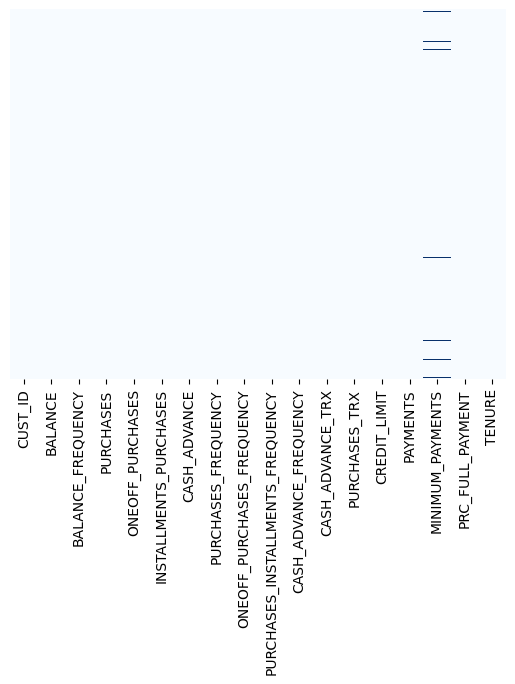

In [20]:
# Heat map for missing data 
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Fill the missing values - Column MINIMUM_PAYMENTS and CREDIT_LIMIT

In [23]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [24]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


Check for Duplicate Data 

In [25]:
creditcard_df.duplicated().sum()

0

Check missing values 

In [27]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Missing values Heatmap 

<Axes: >

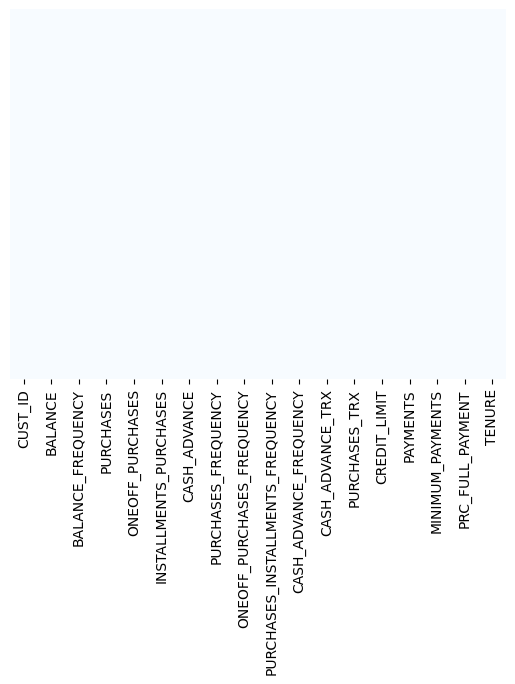

In [28]:
 sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [29]:
# Check for duplicated entries in the data
creditcard_df.duplicated().sum()

0

Drop customer id column  

In [30]:
# Drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)
display(creditcard_df)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

Number of Columns 

In [31]:
n = len(creditcard_df.columns)
display(n)

17

Display Column Names 

In [32]:
display (creditcard_df.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

Create dist plot 

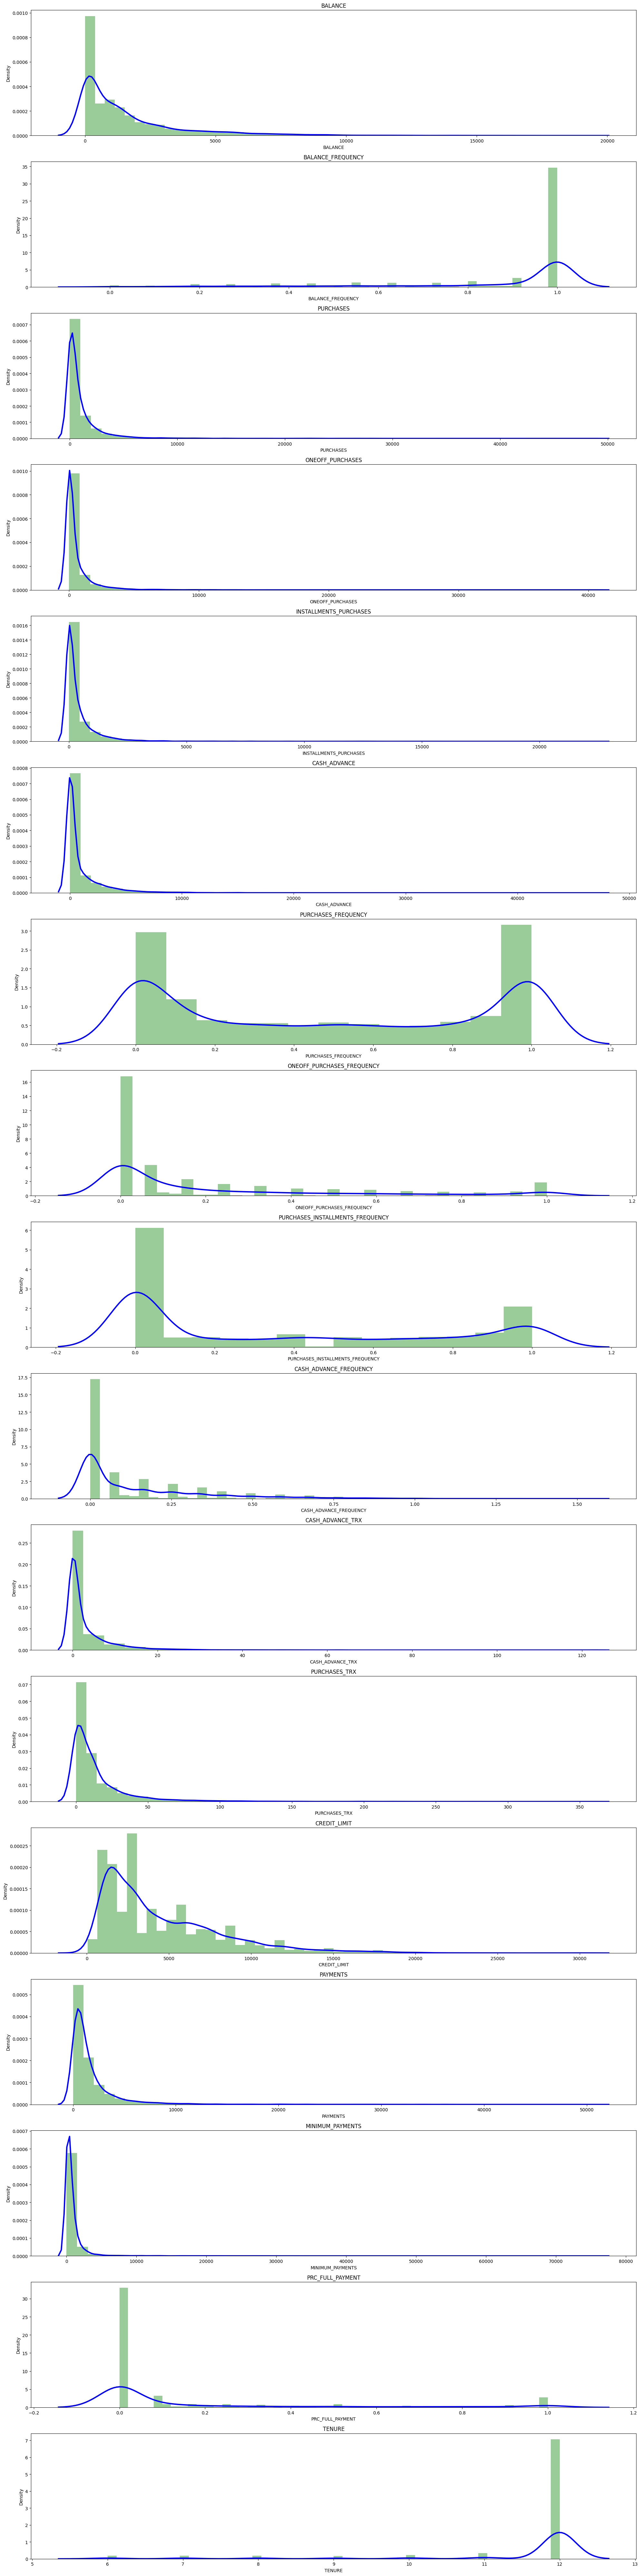

In [34]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(20,80))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

Create Pair Plot  

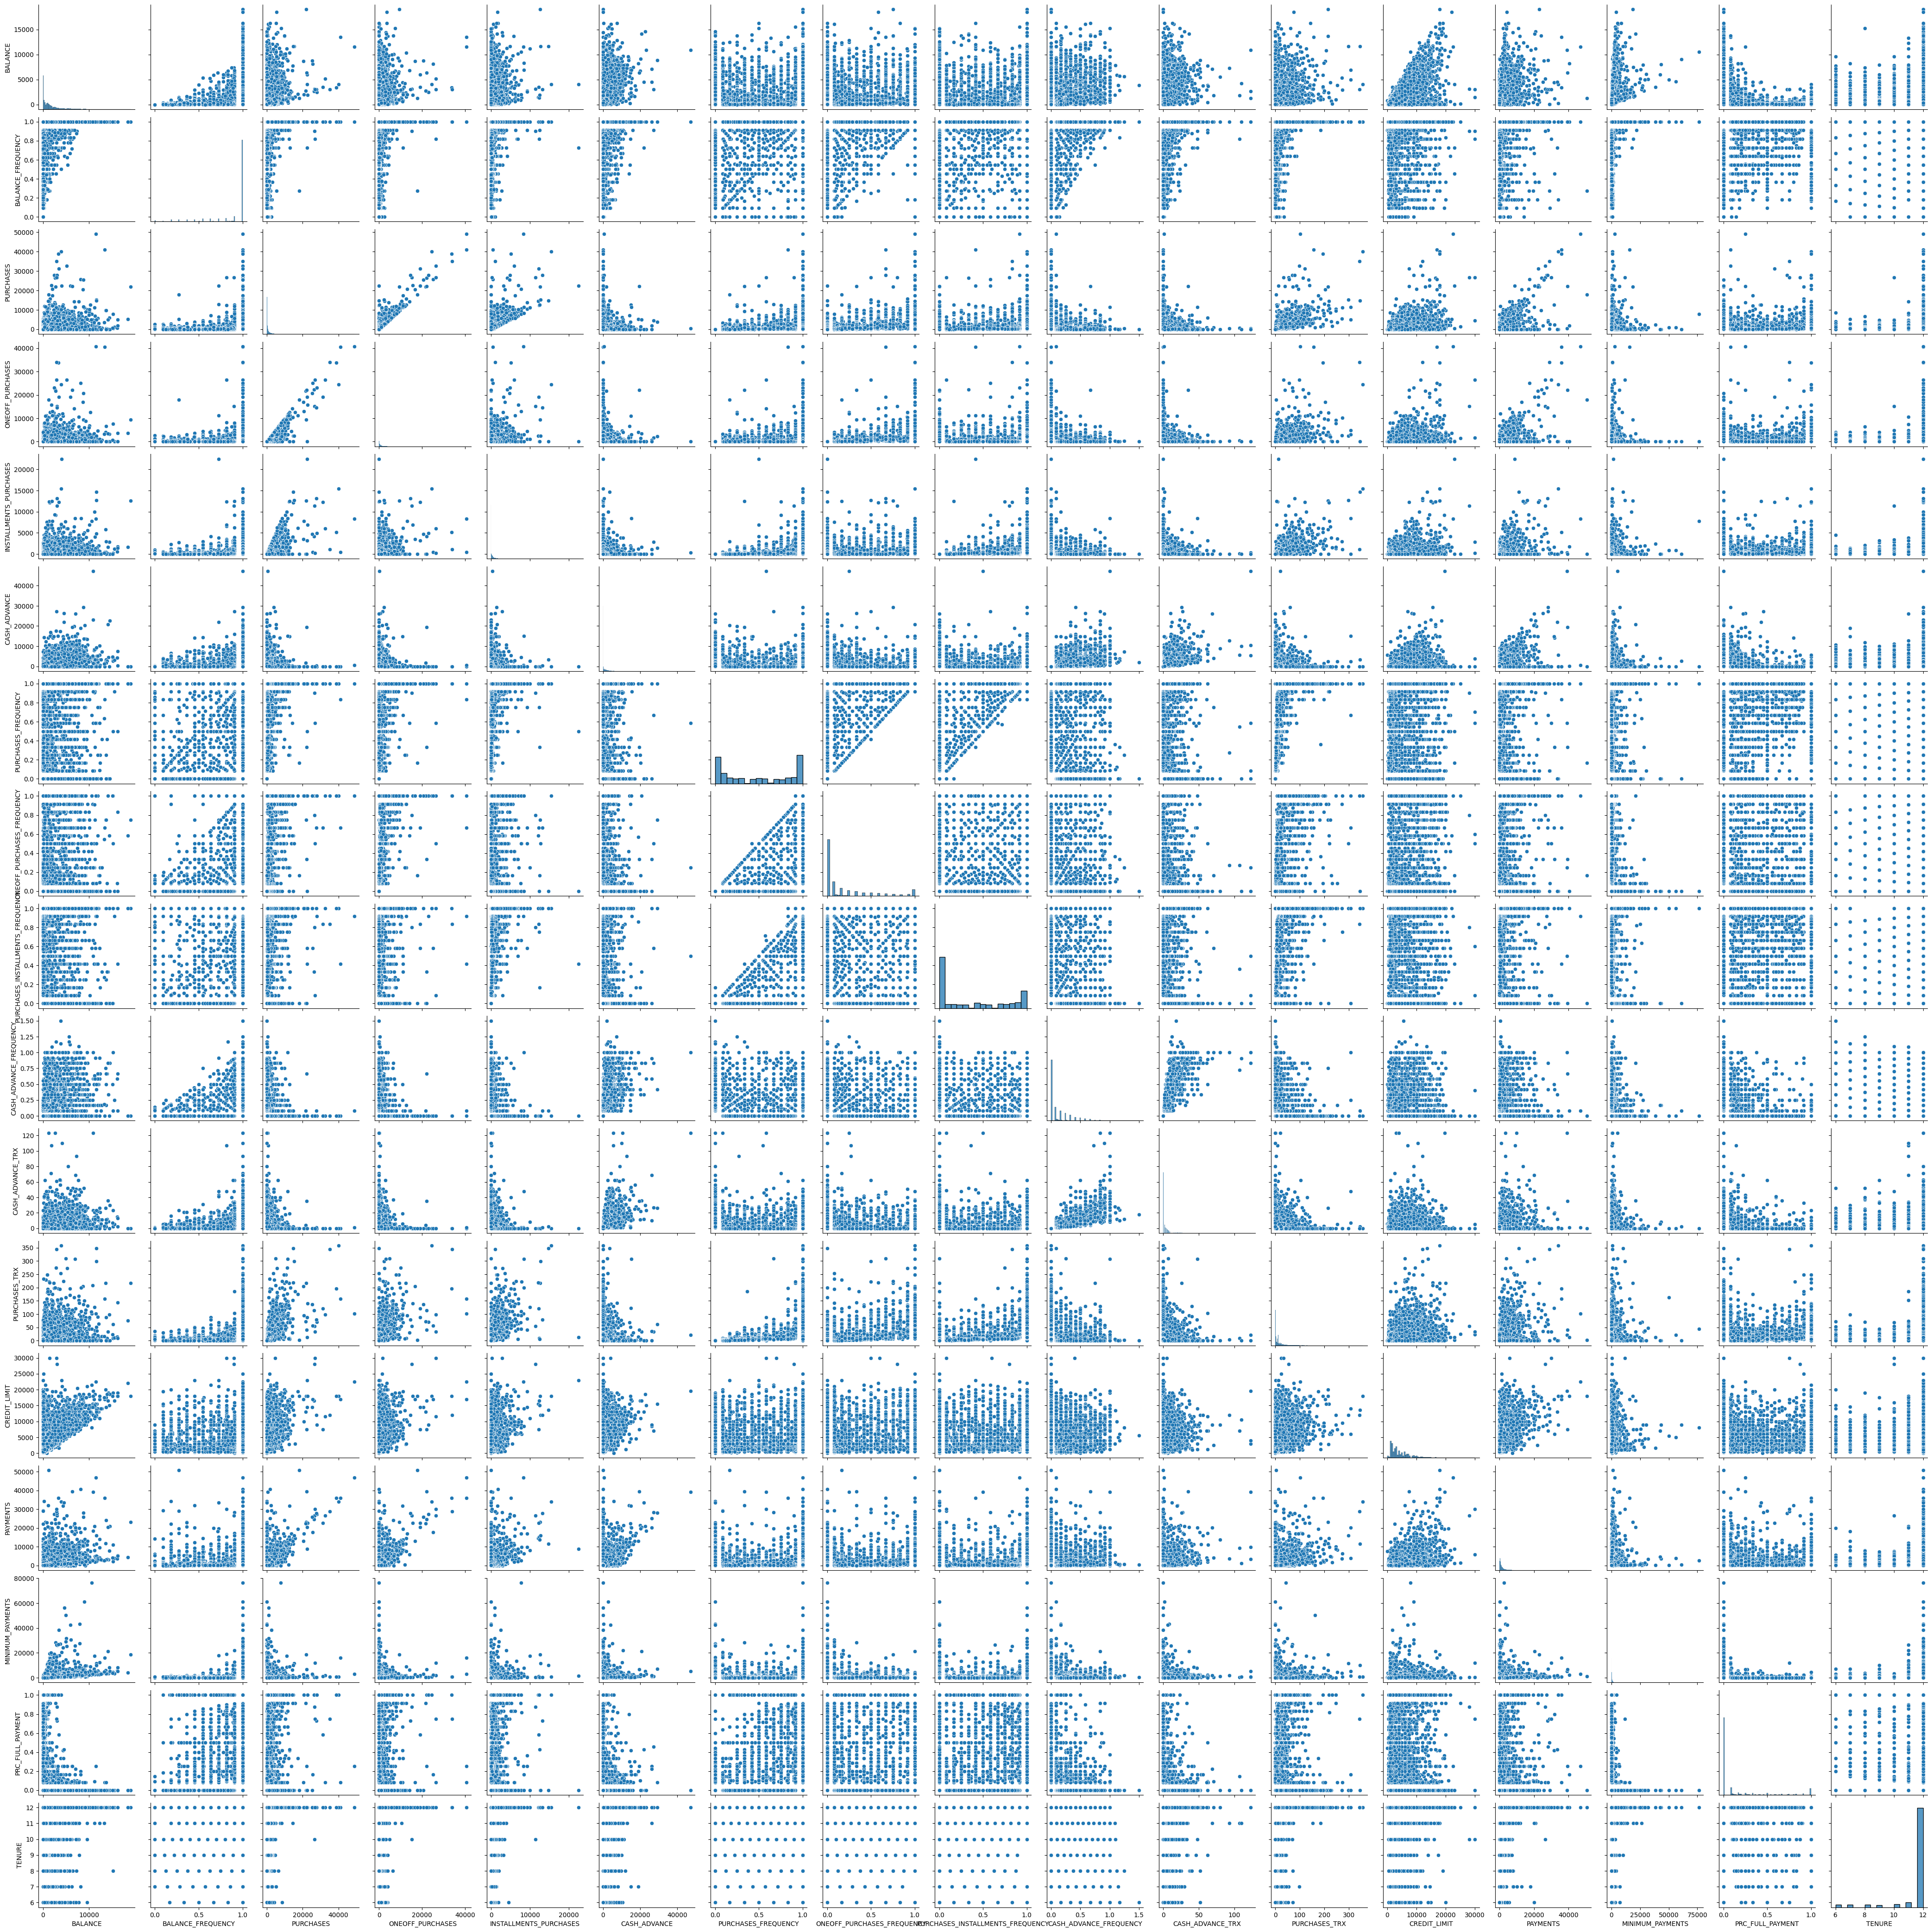

In [36]:
sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

Display Co relation Matrix  

In [37]:
correlations = creditcard_df.corr()
display (correlations )

BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT                      0.531267           0.095795   0.356959   
PAYMENTS                          0.322802           0.065008   0.603264   
MINIMUM_PAYMENTS                  0.394282           0.114249   0.093515   
PRC_FULL_PAYMENT                 -0.318959          -0.095082   0.180379   
TENURE                            0.072692           0.119776   0.086288   

                                  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                   0.164350                0.126469   
BALANCE_FREQUENCY                         0.104323                0.124292   
PURCHASES                                 0.916845                0.679896   
ONEOFF_PURCHASES                          1.000000                0.330622   
INSTALLMENTS_PURCHASES                    0.330622                1.000000   
CASH_ADVANCE                             -0.031326               -0.064244   
PURCHASES_FREQUENCY                       0.264937                0.442418   
ONEOFF_PURCHASES_FREQUENCY                0.524891                0.214042   
PURCHASES_INSTALLMENTS_FREQUENCY          0.127729                0.511351   
CASH_ADVANCE_FREQUENCY                   -0.082628               -0.132318   
CASH_ADVANCE_TRX                         -0.046212               -0.073999   
PURCHASES_TRX                             0.545523                0.628108   
CREDIT_LIMIT                              0.319721                0.256496   
PAYMENTS                                  0.567292                0.384084   
MINIMUM_PAYMENTS                          0.048597                0.131687   
PRC_FULL_PAYMENT                          0.132763                0.182569   
TENURE                                    0.064150                0.086143   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.496692            -0.077944   
BALANCE_FREQUENCY                     0.099388             0.229715   
PURCHASES                            -0.051474             0.393017   
ONEOFF_PURCHASES                     -0.031326             0.264937   
INSTALLMENTS_PURCHASES               -0.064244             0.442418   
CASH_ADVANCE                          1.000000            -0.215507   
PURCHASES_FREQUENCY                  -0.215507             1.000000   
ONEOFF_PURCHASES_FREQUENCY           -0.086754             0.501343   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177070             0.862934   
CASH_ADVANCE_FREQUENCY                0.628522            -0.308478   
CASH_ADVANCE_TRX                      0.656498            -0.203478   
PURCHASES_TRX                        -0.075850             0.568430   
CREDIT_LIMIT                          0.303983             0.119778   
PAYMENTS                              0.453238             0.103464   
MINIMUM_PAYMENTS                      0.139223             0.002976   
PRC_FULL_PAYMENT                     -0.152935             0.305802   
TENURE                               -0.068312        

Create Heat Map 

<Axes: >

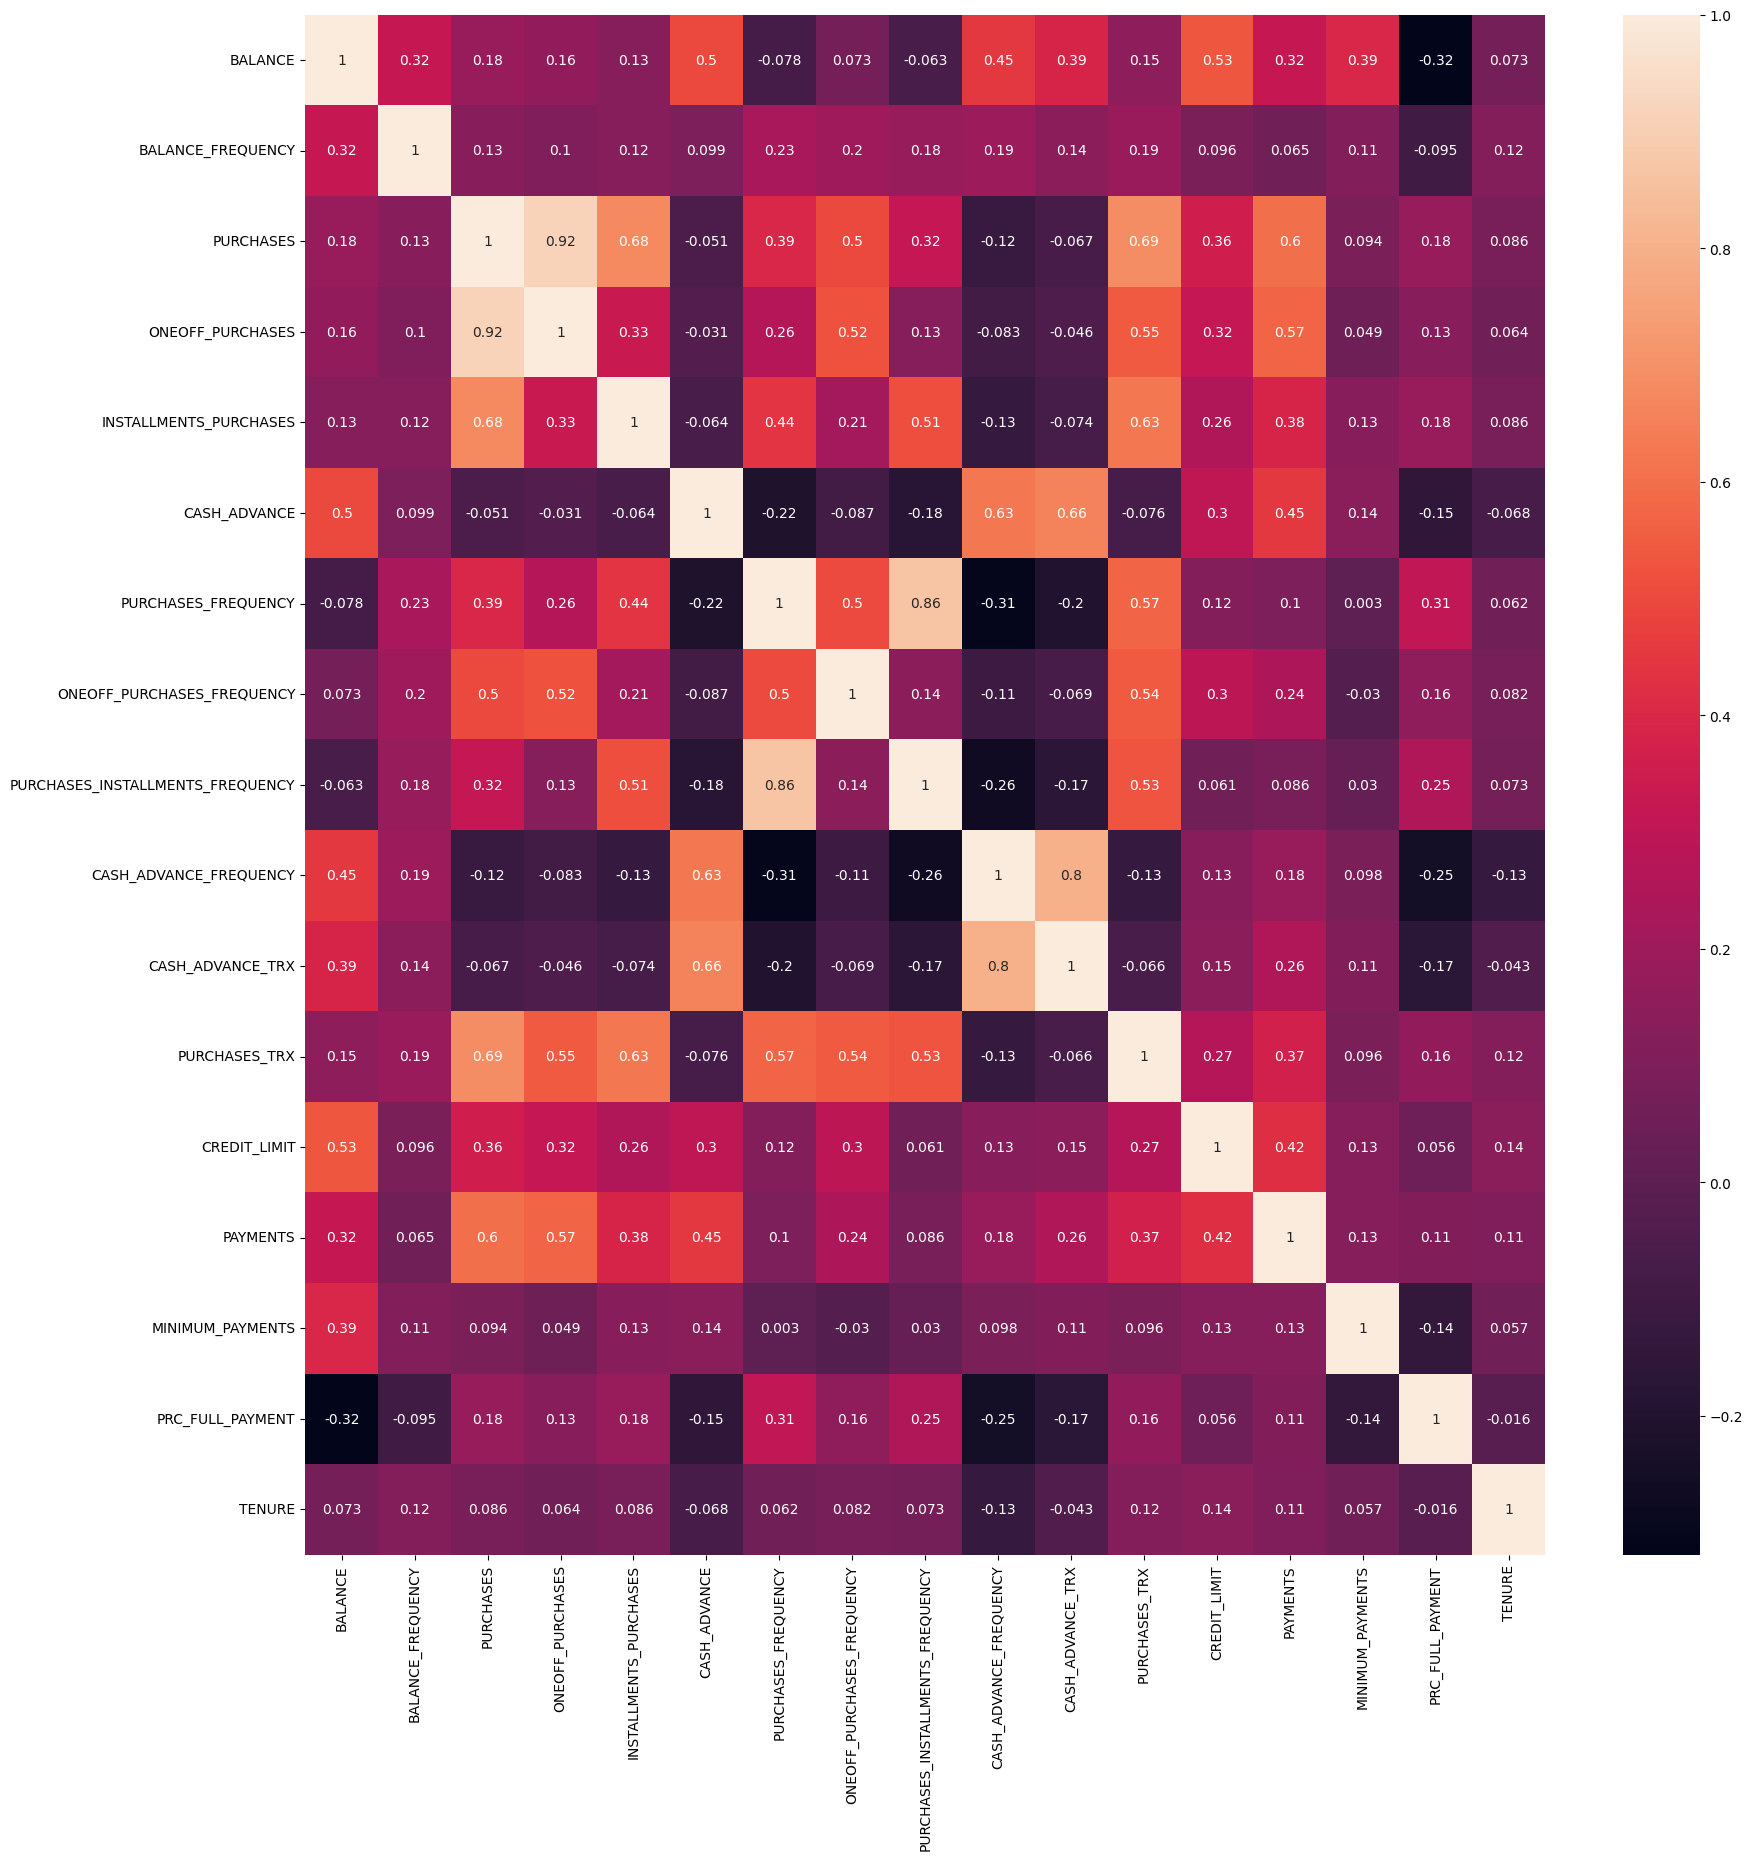

In [38]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

OPTIMAL NUMBER OF CLUSTERS 

Display the Data Set 

In [41]:
display (creditcard_df)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

Standardise the Data  

In [42]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)


Display the Shape

In [43]:
creditcard_df_scaled.shape

(8950, 17)

Display the Shape

In [44]:
display(pd.DataFrame(creditcard_df_scaled))

0         1         2         3         4         5         6   \
0    -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1     0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2     0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3     0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4    -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.737950  0.518084 -0.333293 -0.356934 -0.132643 -0.466786  1.269843   
8946 -0.742423  0.518084 -0.329136 -0.356934 -0.122823 -0.466786  1.269843   
8947 -0.740398 -0.185477 -0.401965 -0.356934 -0.294893 -0.466786  0.854576   
8948 -0.745174 -0.185477 -0.469552 -0.356934 -0.454576 -0.449352 -1.221758   
8949 -0.572575 -0.889033  0.042146  0.301732 -0.454576 -0.406205  0.439310   

            7         8         9         10        11        12        13  \
0    -0.678661 -0.707313 -0.675349 -0.476070 -0.511333 -0.960433 -0.528979   
1    -0.678661 -0.916995  0.573963  0.110074 -0.591796  0.688639  0.818642   
2     2.673451 -0.916995 -0.675349 -0.476070 -0.109020  0.826062 -0.383805   
3    -0.399319 -0.916995 -0.258913 -0.329534 -0.551565  0.826062 -0.598688   
4    -0.399319 -0.916995 -0.675349 -0.476070 -0.551565 -0.905464 -0.364368   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.486217   
8946 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.503396   
8947 -0.678661  0.760469 -0.675349 -0.476070 -0.390639 -0.960433 -0.570615   
8948 -0.678661 -0.916995  0.157527 -0.182998 -0.591796 -1.097856 -0.580536   
8949  1.556082 -0.916995  0.990398 -0.182998  0.333524 -0.905464 -0.576869   

                14        15        16  
0    -3.109675e-01 -0.525551  0.360680  
1     8.931021e-02  0.234227  0.360680  
2    -1.016632e-01 -0.525551  0.360680  
3     4.878305e-17 -0.525551  0.360680  
4    -2.657913e-01 -0.525551  0.360680  
...            ...       ...       ...  
8945 -3.498541e-01  1.183951 -4.122768  
8946  4.878305e-17 -0.525551 -4.122768  
8947 -3.354655e-01  0.329200 -4.122768  
8948 -3.469065e-01  0.329200 -4.122768  
8949 -3.329464e-01 -0.525551 -4.122768  

[8950 rows x 17 columns]

Create Elbow Graph  

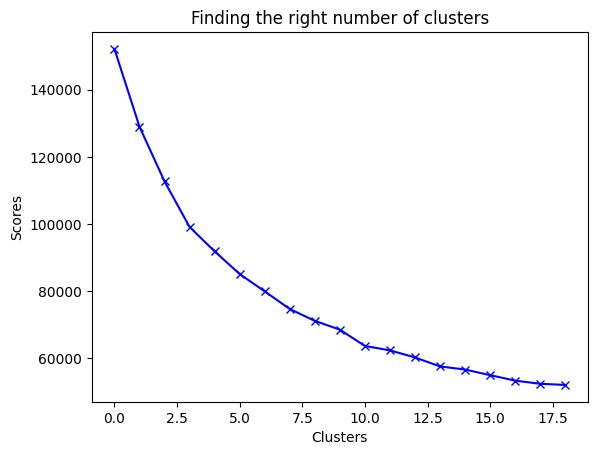

In [45]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

# From this we can observe that, 4th cluster seems to be forming the elbow of the curve. 
# However, the values does not reduce linearly until 8th cluster. 
# Let's choose the number of clusters to be 7.

APPLY K -Means 

In [46]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

Number of Clusters 

In [47]:
kmeans.cluster_centers_.shape

(8, 17)

Cluster Canters

In [48]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
display(cluster_centers )          

BALANCE BALANCE_FREQUENCY  PURCHASES ONEOFF_PURCHASES  \
0  0.015135          0.401676  -0.360086        -0.239716   
1 -0.689836          0.138850   0.145397         0.012575   
2 -0.699800         -2.200786  -0.322361        -0.242809   
3 -0.154754          0.400280   0.042747        -0.048076   
4  0.767941          0.473271   2.070780         1.735430   
5  1.923051          0.337717  11.212042        10.600367   
6  1.661133          0.392290  -0.215330        -0.147700   
7 -0.332825         -0.344129  -0.287118        -0.205018   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.410893    -0.087612           -0.883632   
1               0.320215    -0.448934            0.916375   
2              -0.315996    -0.314720           -0.576542   
3               0.189318    -0.324006            0.936685   
4               1.708084    -0.212854            1.155205   
5               7.033118     0.419625            1.046983   
6              -0.237854     2.016433           -0.470405   
7              -0.301852     0.072498           -0.196537   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.396319                        -0.788326   
1                   0.369233                         0.737875   
2                  -0.457591                        -0.449006   
3                   0.253708                         0.844046   
4                   1.734325                         1.080259   
5                   1.915501                         0.981334   
6                  -0.175897                        -0.429492   
7                  -0.269970                        -0.234654   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.117270        -0.021254     -0.490471    -0.300035   
1              -0.643047        -0.458441      0.239925     0.144182   
2              -0.512310        -0.369474     -0.426412    -0.193528   
3              -0.391518        -0.314284      0.252429    -0.174722   
4              -0.309542        -0.227256      2.444224     1.159369   
5              -0.258912         0.061229      5.362438     3.044064   
6               1.929081         1.940767     -0.264191     1.018817   
7               0.313908         0.002881     -0.385982    -0.563404   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.248018        -0.007566        -0.451779  0.271649  
1 -0.106995        -0.292148         2.167427  0.188918  
2 -0.208250        -0.253790         0.114249  0.197074  
3 -0.157935         0.023235        -0.336341  0.288790  
4  1.139322         0.332806         0.218624  0.316643  
5  8.098975         1.120318         1.110132  0.310863  
6  0.821953         0.503051        -0.392101  0.068281  
7 -0.392199        -0.205867        -0.035486 -3.194122

Inverse Transformation- Convert to original Data

In [49]:
# In order to understand what these numbers mean, perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
display(cluster_centers)

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  1595.977104          0.972424    233.875047       194.558340   
1   128.638825          0.910163   1313.848260       613.309356   
2   107.899326          0.355925    314.474781       189.423691   
3  1242.368480          0.972093   1094.534440       512.640782   
4  3162.878330          0.989384   5427.457293      3472.895175   
5  5567.142164          0.957273  24957.905000     18186.875667   
6  5021.982324          0.970201    543.148341       347.285229   
7   871.727207          0.795750    389.773601       252.149727   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              39.502124   795.145112            0.135706   
1             700.634479    37.436073            0.858136   
2             125.316327   318.889451            0.258957   
3             582.265675   299.414996            0.866288   
4            1955.667090   532.505889            0.953990   
5            6771.029333  1858.844605            0.910556   
6             195.979439  5207.426348            0.301554   
7             138.106190  1130.903517            0.411471   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.084228                         0.051137   
1                   0.312607                         0.657688   
2                   0.065949                         0.185991   
3                   0.278144                         0.699883   
4                   0.719840                         0.793760   
5                   0.773889                         0.754444   
6                   0.149984                         0.193746   
7                   0.121920                         0.271180   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.158611         3.103784      2.518546   3402.797552   
1               0.006464         0.120301     20.673469   5019.043550   
2               0.032626         0.727435      4.110813   3790.316751   
3               0.056797         1.104070     20.984274   3858.738635   
4               0.073202         1.697974     75.464088   8712.707182   
5               0.083333         3.666667    148.000000  15570.000000   
6               0.521173        16.493135      8.143021   8201.320990   
7               0.197960         3.268489      5.115756   2444.556993   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   1015.155052       846.573757         0.021577  11.880854  
1   1423.404727       183.368356         0.787650  11.770140  
2   1130.279788       272.759429         0.187131  11.781055  
3   1275.938111       918.355586         0.055341  11.903793  
4   5031.368305      1639.796192         0.217658  11.941068  
5  25178.882690      3475.059479         0.478409  11.933333  
6   4112.616849      2036.545744         0.039032  11.608696  
7    597.766825       384.441450         0.143336   7.242765

Display Cluster Details 

In [50]:
display(labels.shape) # Labels associated to each data point
display (labels.max())
display (labels.min())
         

(8950,)

7

0

Display Cluster numbers 

In [51]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
display(y_kmeans)


array([3, 5, 2, ..., 1, 3, 3])

Concatenate the clusters labels to our original data frame

In [52]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        0  
1  4103.032597       1072.340217          0.222222      12        6  
2   622.066742        627.284787          0.000000      12        3  
3     0.000000        864.206542          0.000000      12        0  
4   678.334763        244.791237          0.000000      12        0

Plot the histogram of various clusters

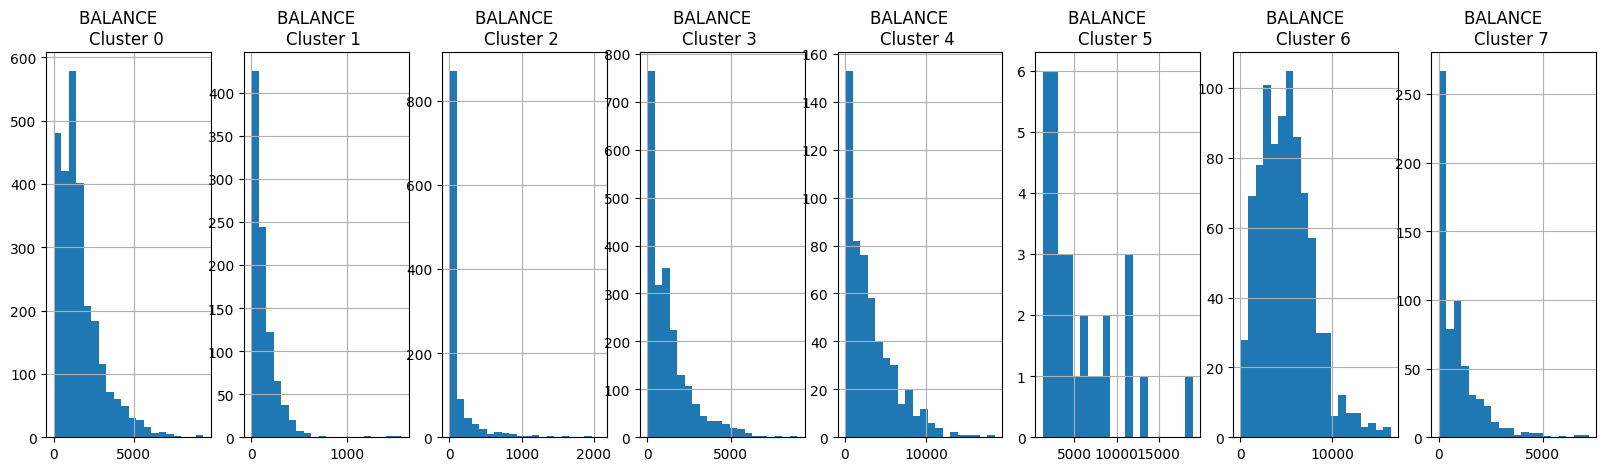

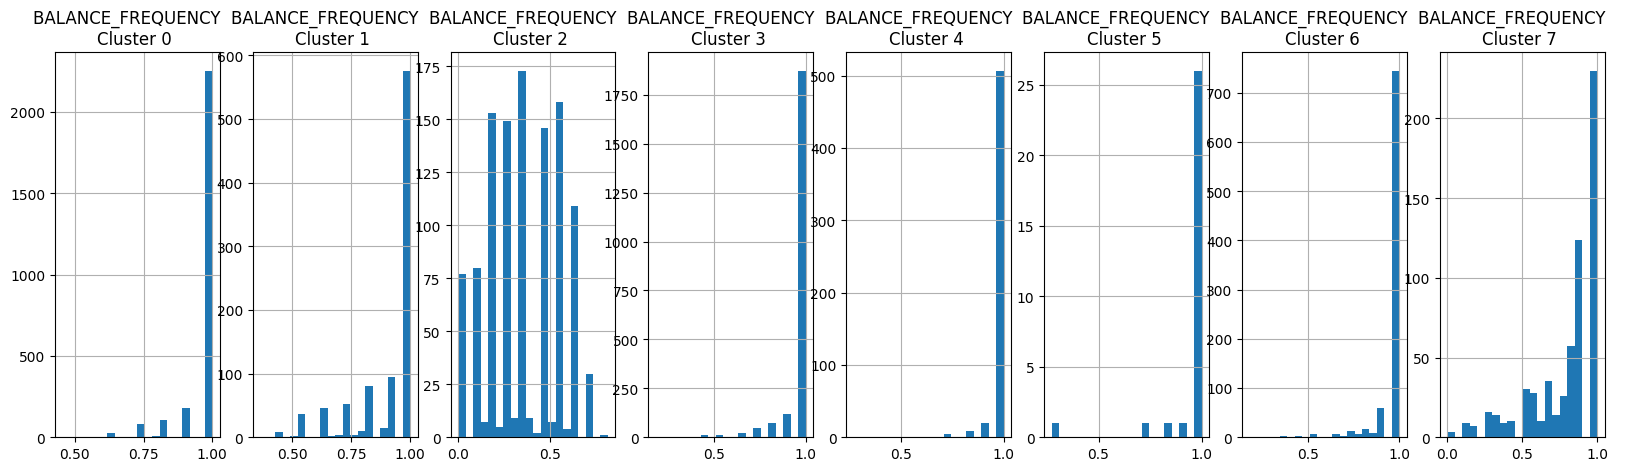

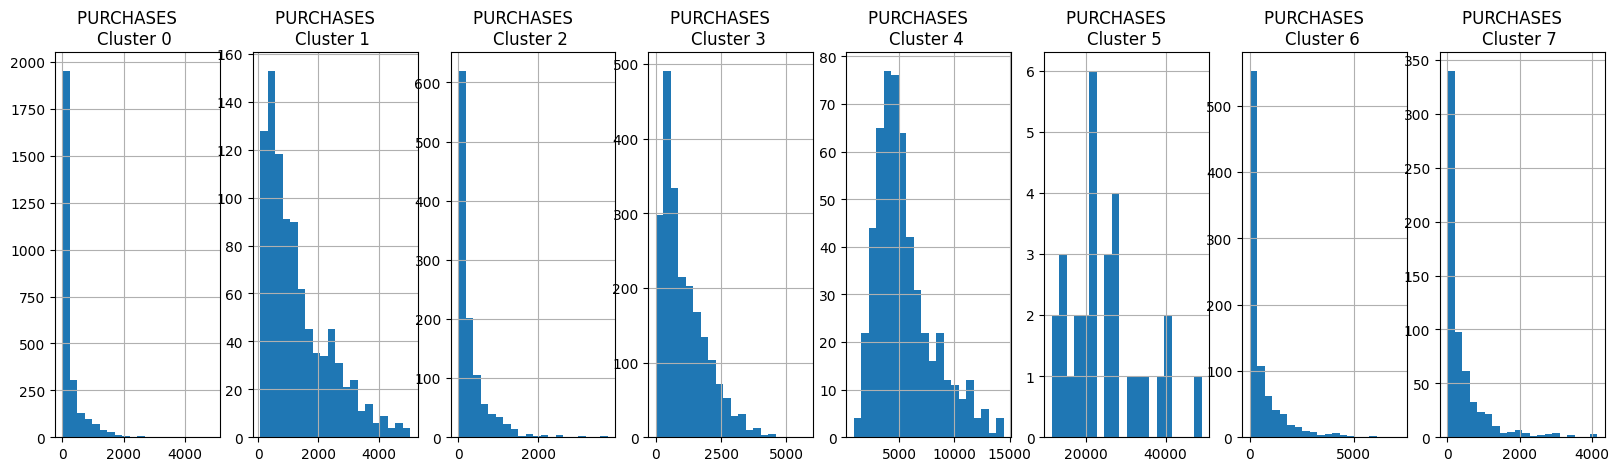

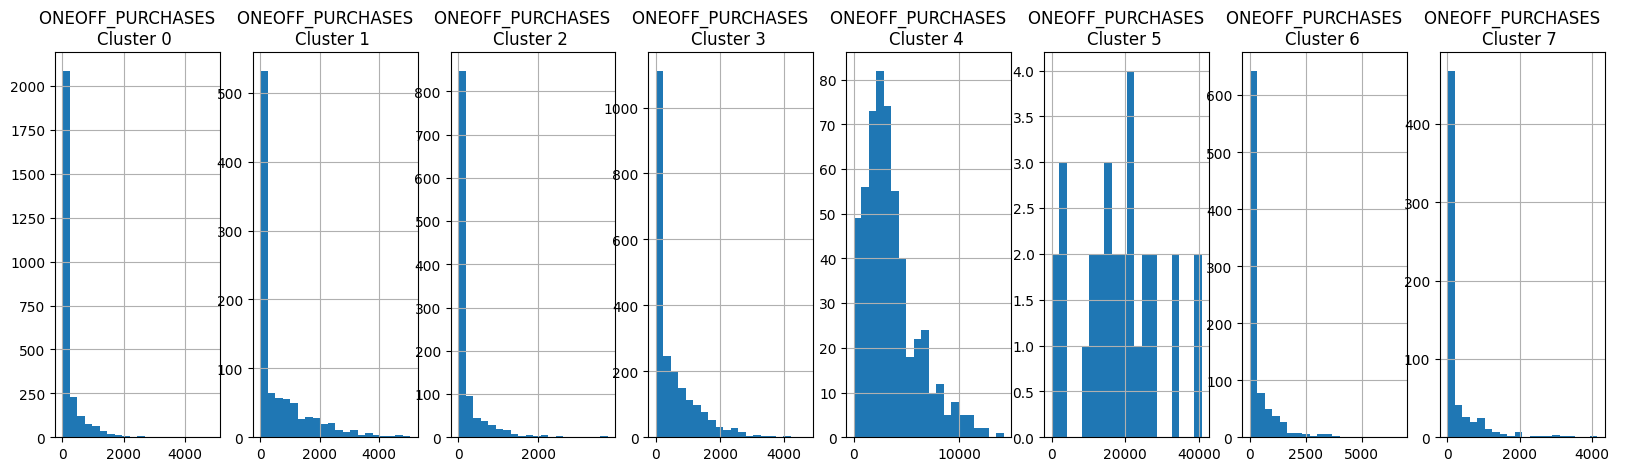

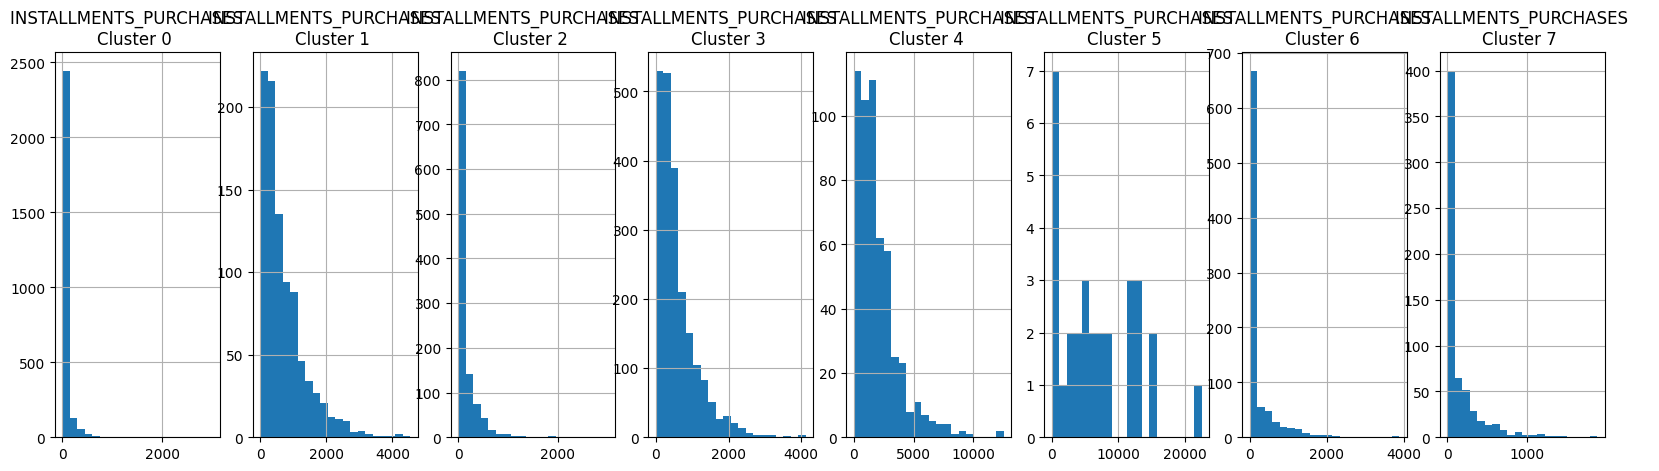

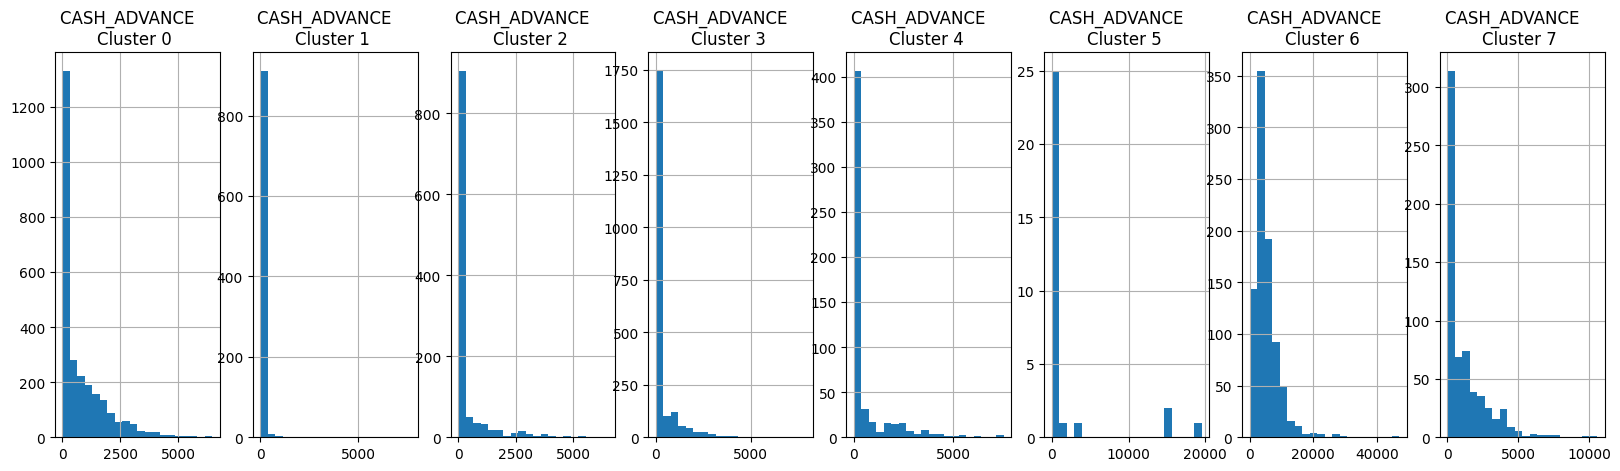

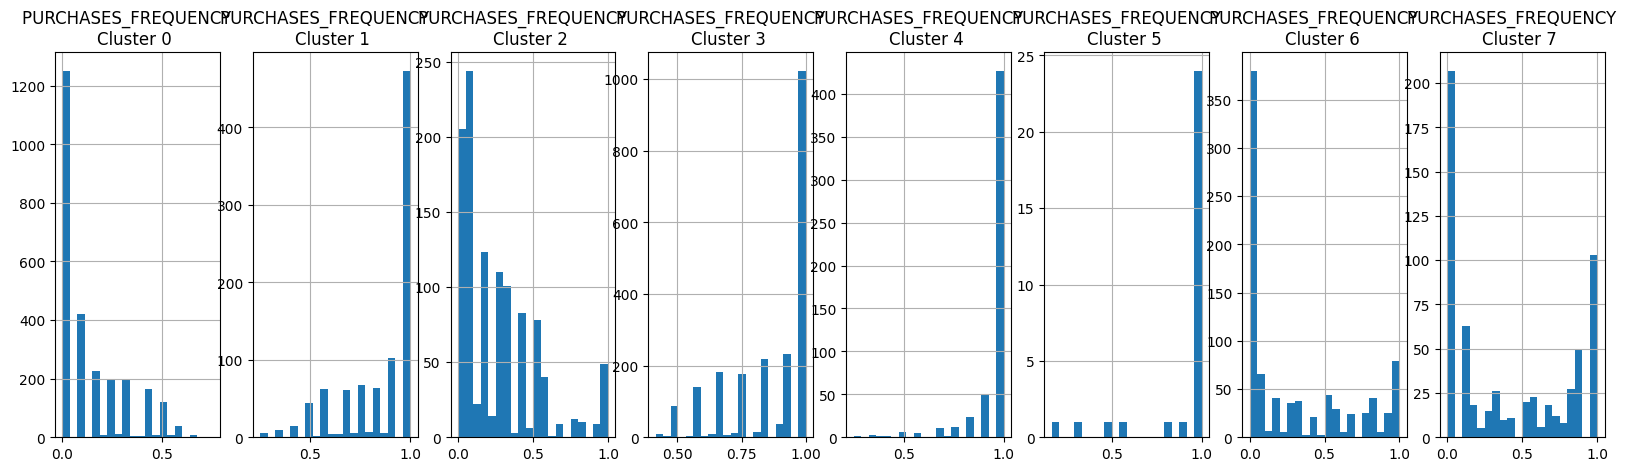

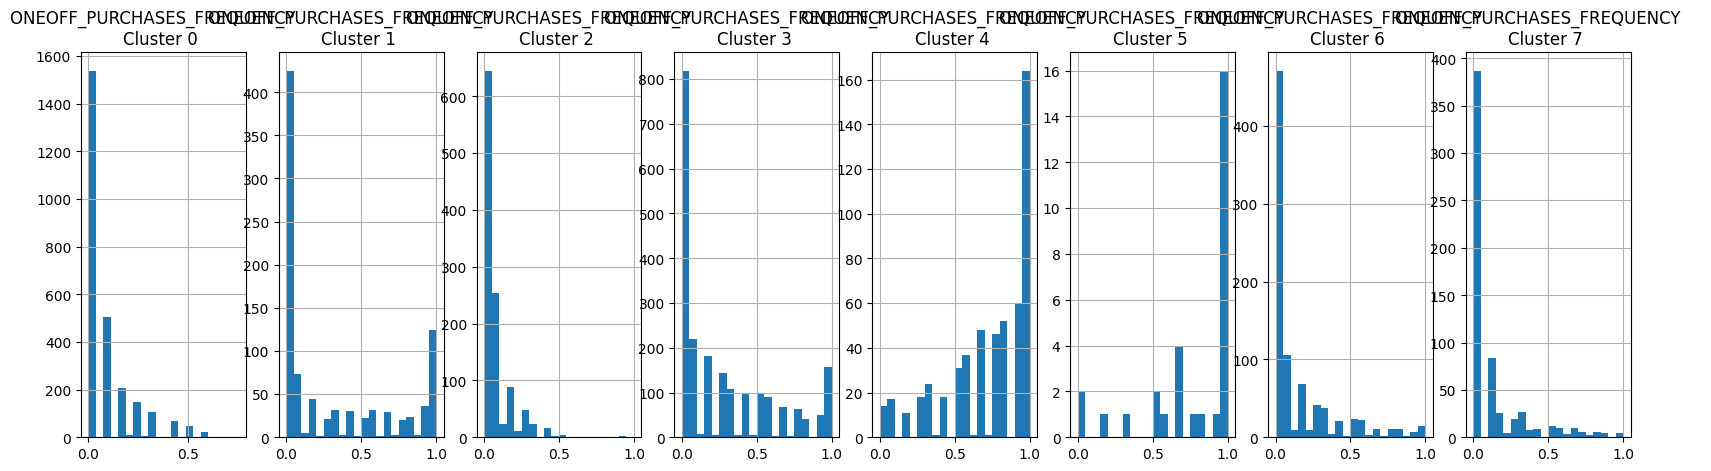

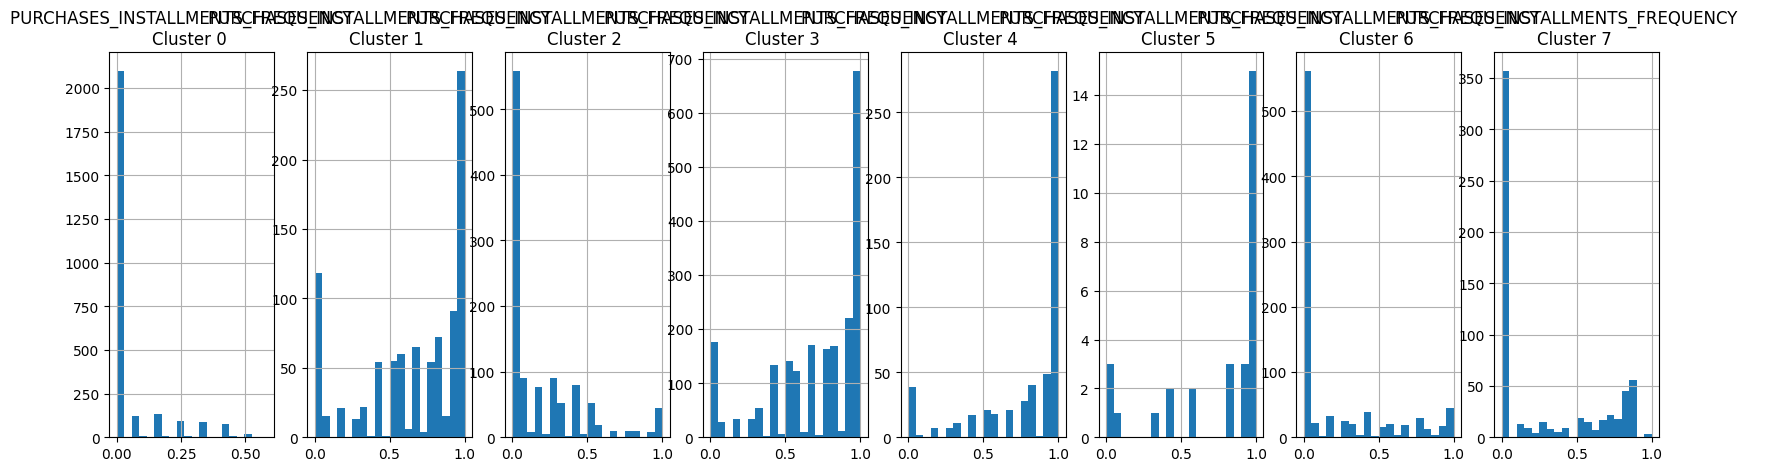

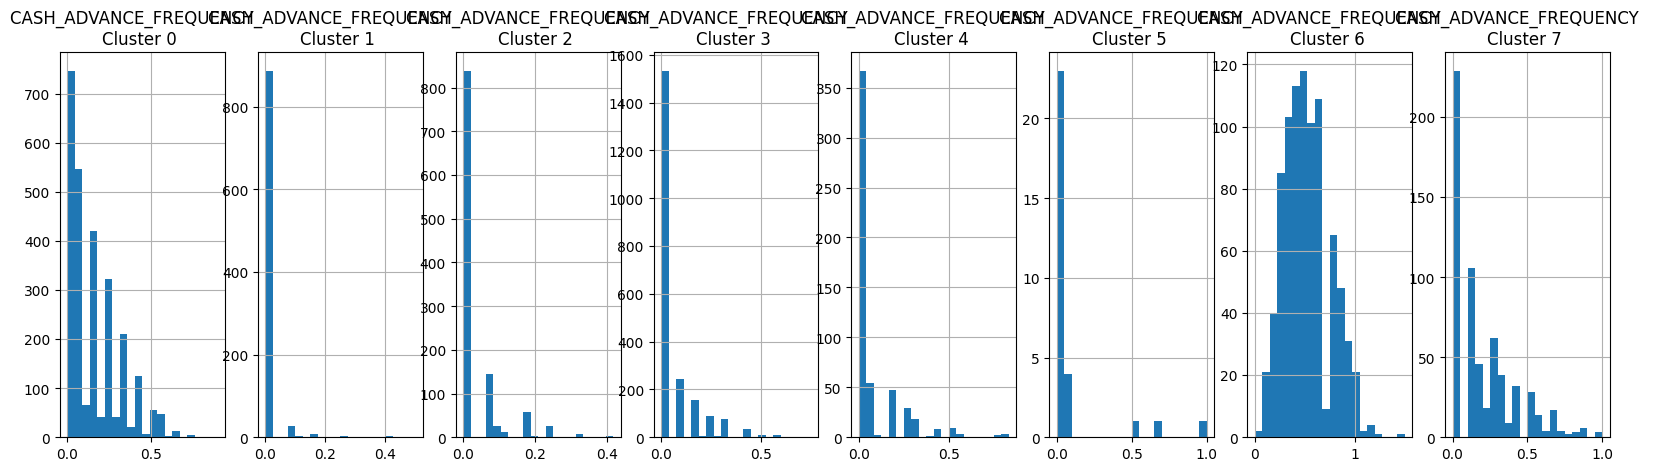

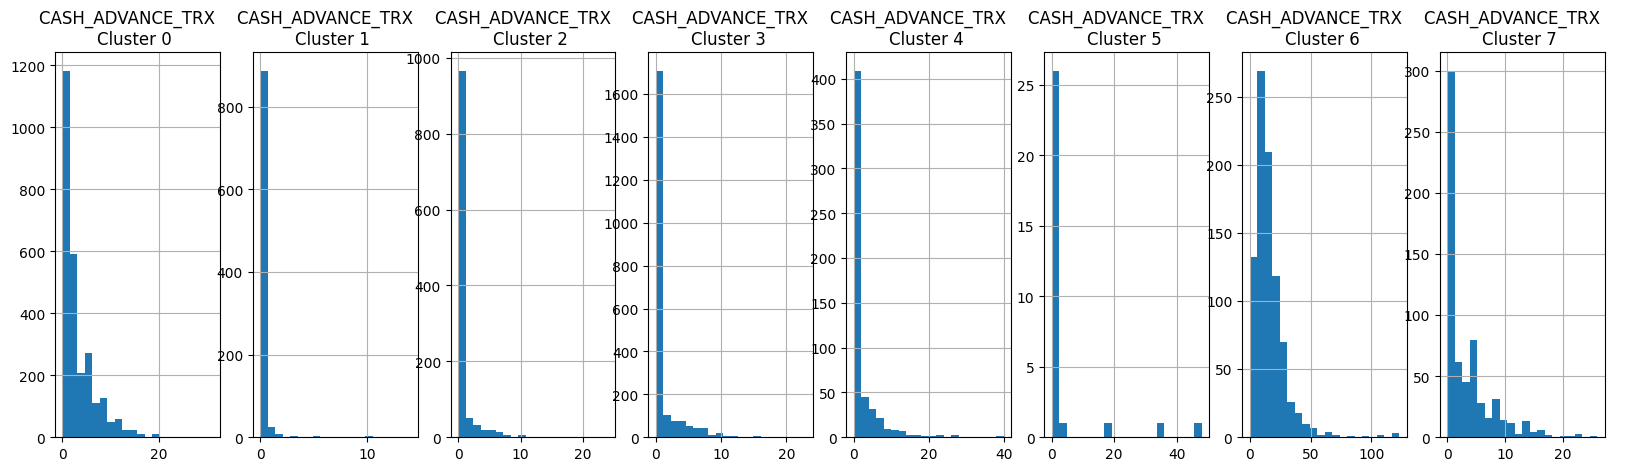

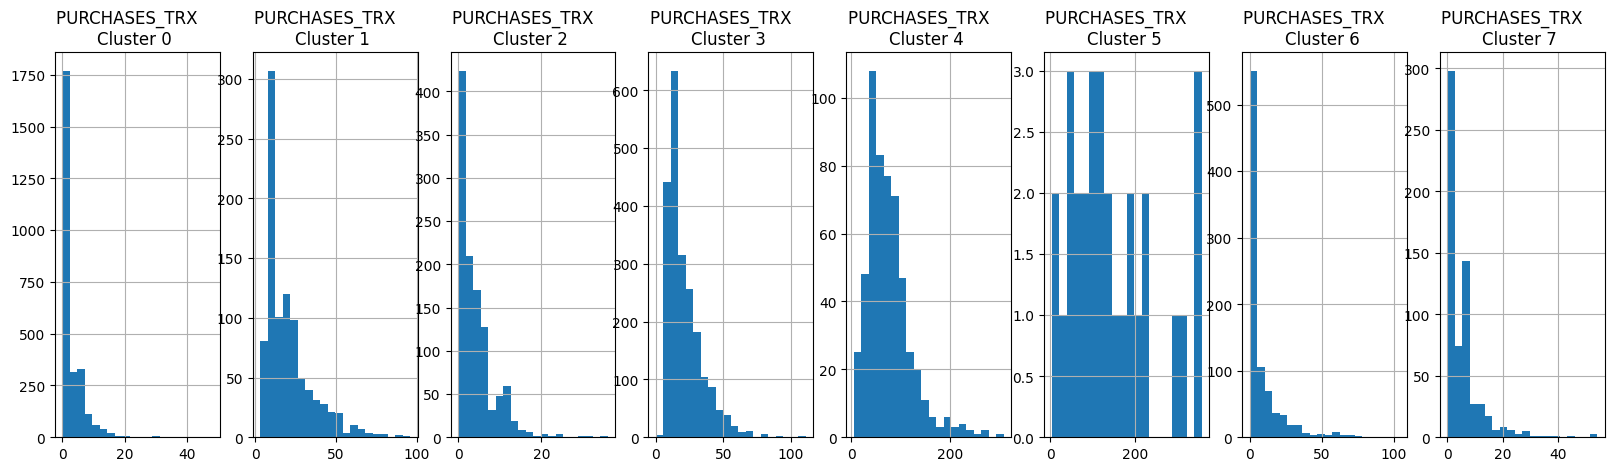

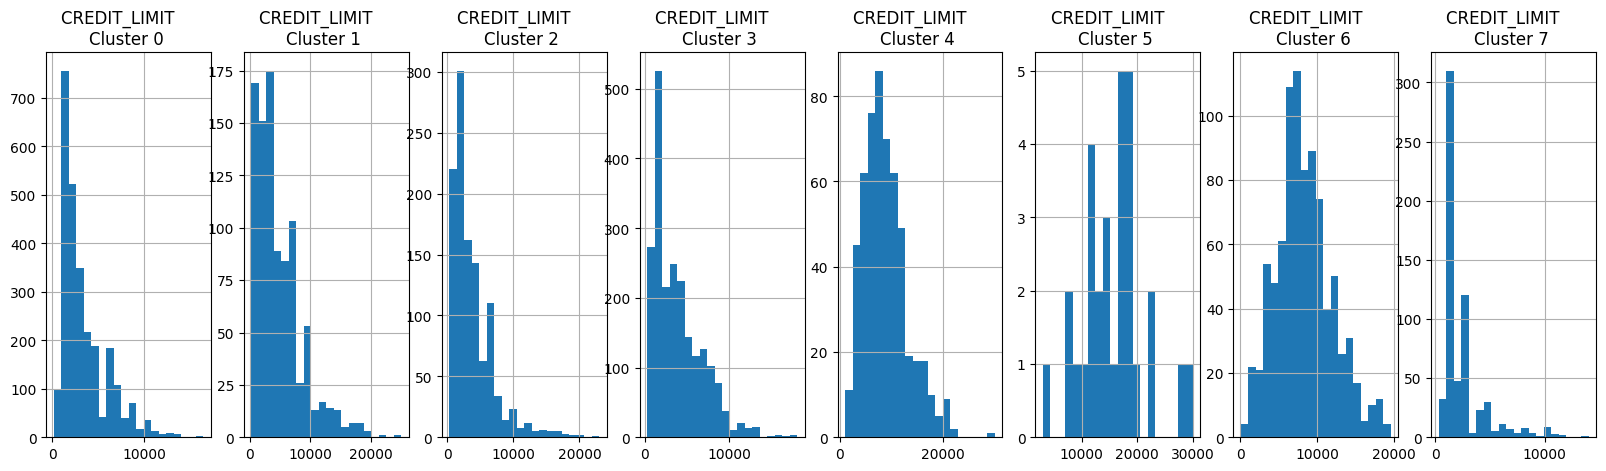

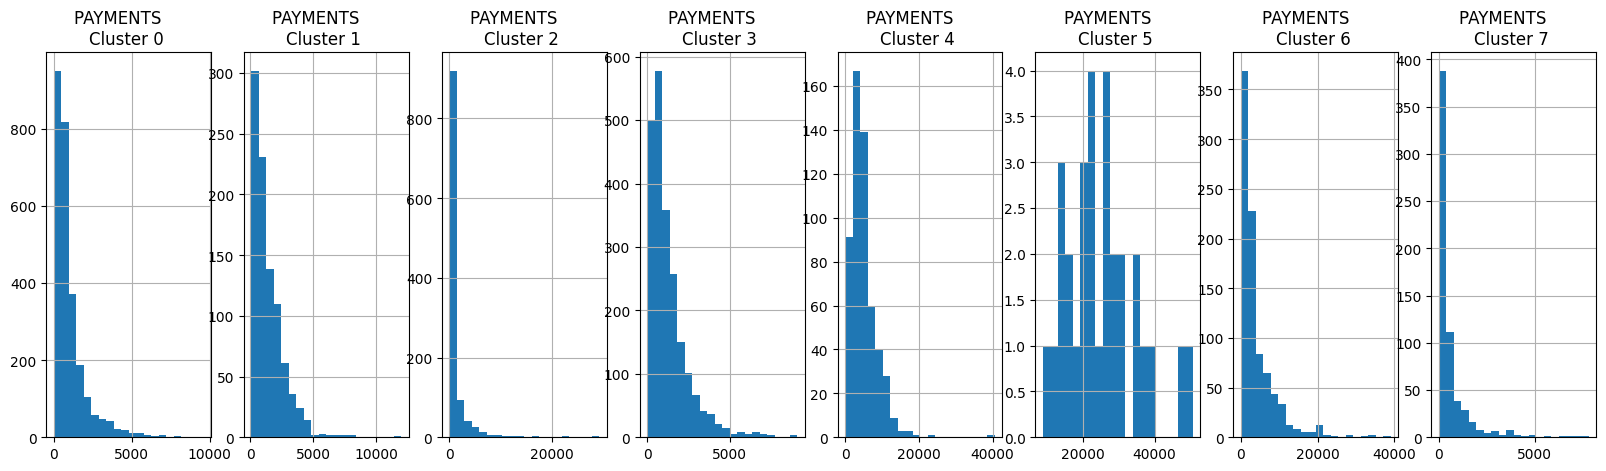

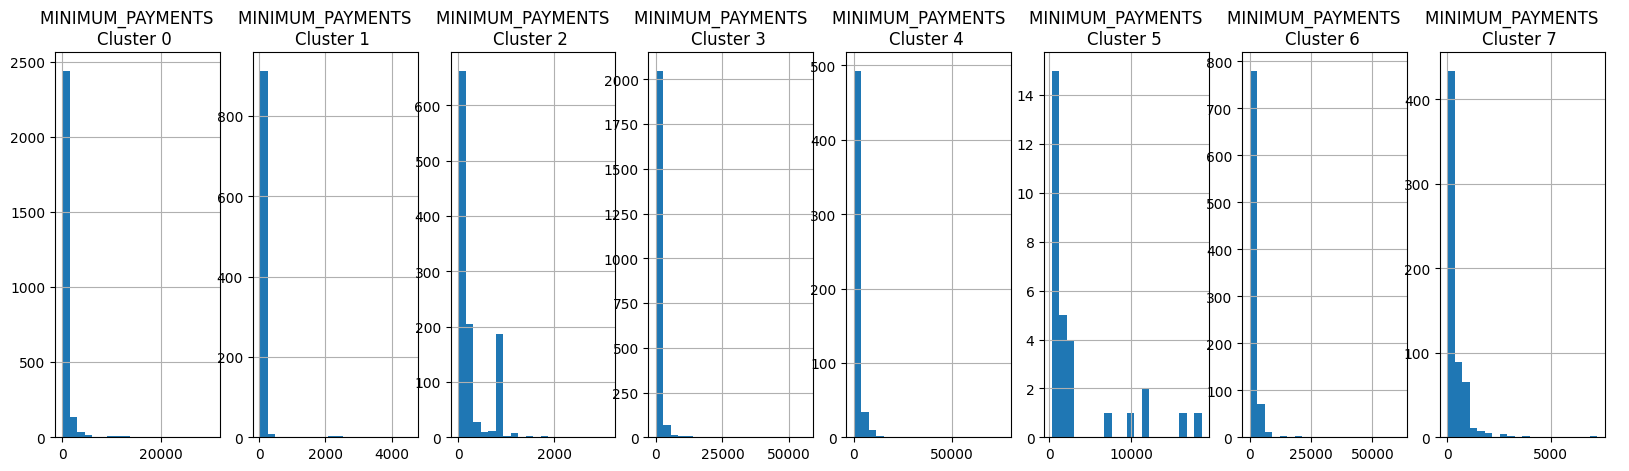

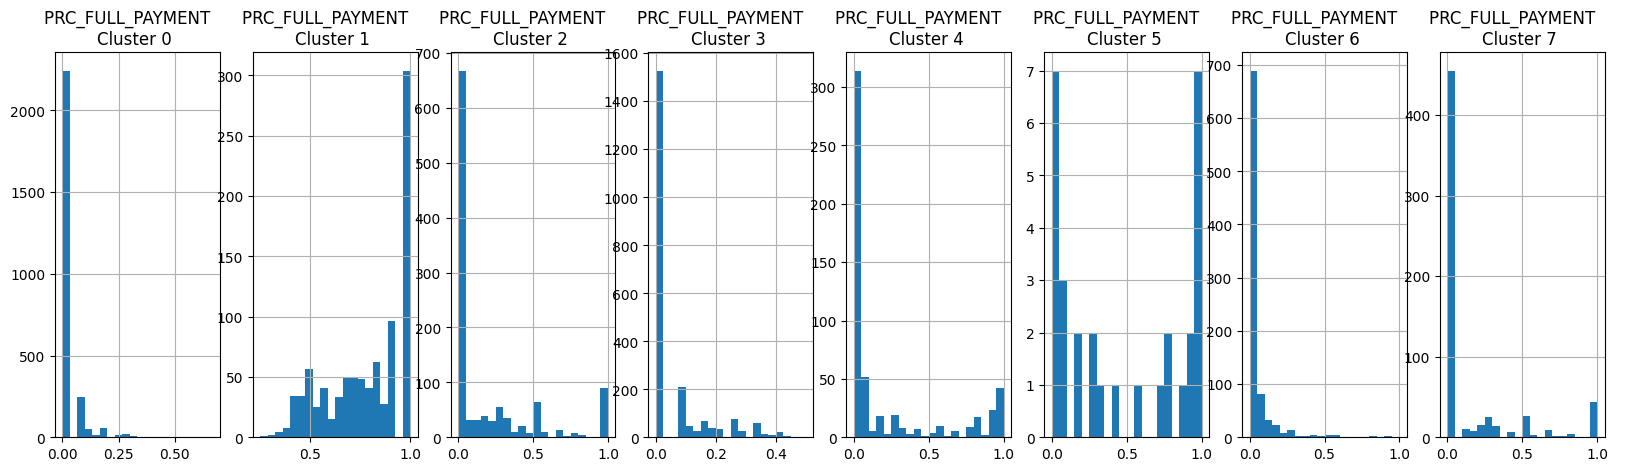

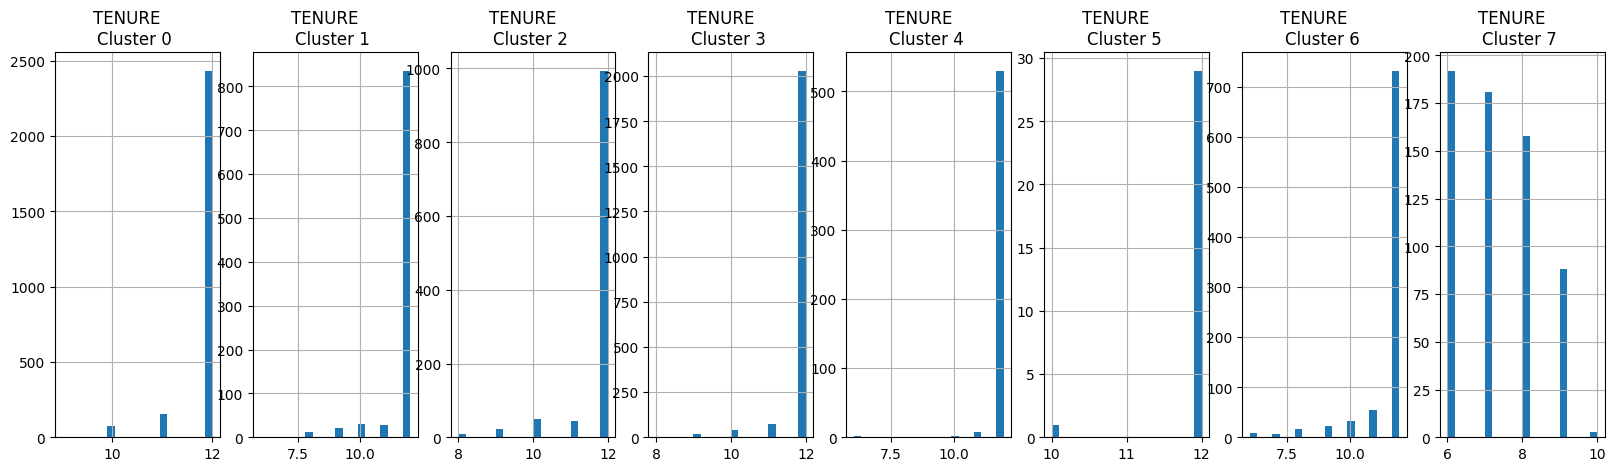

In [53]:
for i in creditcard_df.columns:
  plt.figure(figsize = (20,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()


PRINCIPAL COMPONENT ANALYSIS 

In [54]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
display(principal_comp)

array([[-1.68221979, -1.07645049],
       [-1.13829648,  2.50648419],
       [ 0.96968106, -0.38351597],
       ...,
       [-0.92620222, -1.81078897],
       [-2.33654929, -0.65797176],
       [-0.55642321, -0.4004678 ]])

Create a data frame with the two components

In [55]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

pca1      pca2
0 -1.682220 -1.076450
1 -1.138296  2.506484
2  0.969681 -0.383516
3 -0.873627  0.043167
4 -1.599433 -0.688581

Concatenate the clusters labels to the data frame

In [56]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
display(pca_df)

pca1      pca2  cluster
0    -1.682220 -1.076450        0
1    -1.138296  2.506484        6
2     0.969681 -0.383516        3
3    -0.873627  0.043167        0
4    -1.599433 -0.688581        0
...        ...       ...      ...
8945 -0.359628 -2.016148        7
8946 -0.564367 -1.639129        7
8947 -0.926202 -1.810789        7
8948 -2.336549 -0.657972        7
8949 -0.556423 -0.400468        7

[8950 rows x 3 columns]

Number of records in each cluster  

In [58]:
pca_df.value_counts(pca_df.cluster)

cluster
0    2669
3    2162
2    1119
1     931
6     874
7     622
4     543
5      30
Name: count, dtype: int64

Plot the graph with two components 

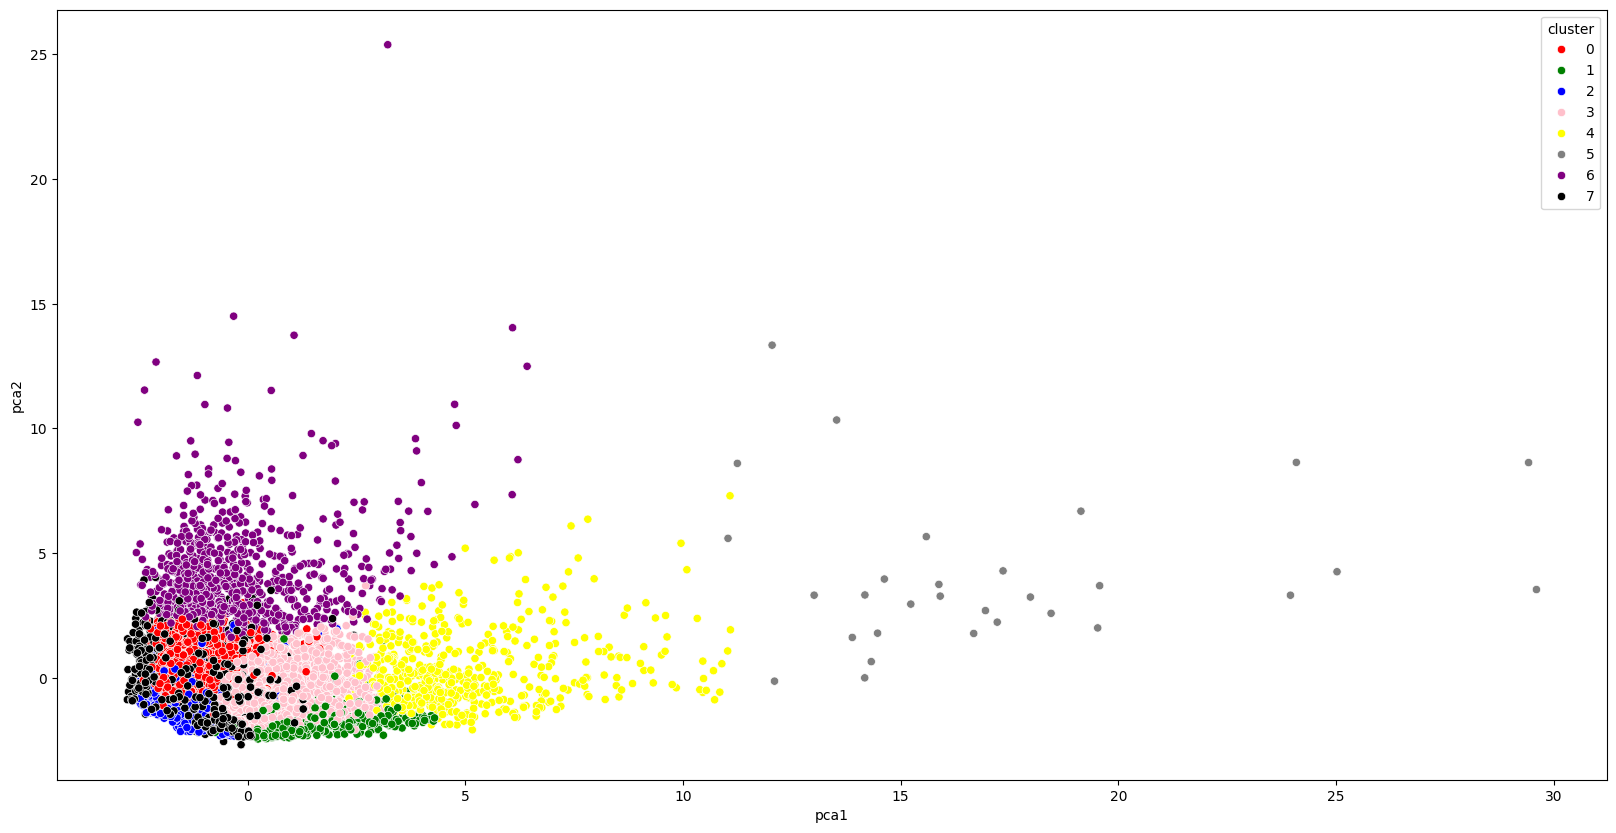

In [59]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

APPLY AUTO ENCODERS 

Create the Layers 

In [60]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform  # This is normalizer
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,)) # 17 Features 


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

Display the shape

In [61]:
display (creditcard_df_scaled.shape)

(8950, 17)

Create Auto Encoder – Fit model 

In [62]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.6396
Epoch 2/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3001
Epoch 3/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.2196
Epoch 4/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.1858
Epoch 5/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.1746
Epoch 6/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1472
Epoch 7/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1452
Epoch 8/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.1281
Epoch 9/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1144
Epoch 10/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.1117
Epoch 11/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.1008
Epoch 12/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0933
Epoch 13/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0912
Epoch 14/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0834
Epoch 15/25
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0803
Epoc

Auto Encoder Summary  

In [63]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │             126 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │           4,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2000)                │       1,002,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │          20,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2000)                │          22,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 500)                 │       1,000,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 17)                  │           8,517 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,922,961 (26.41 MB)

 Trainable params: 2,307,653 (8.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,615,308 (17.61 MB)

Weights 

In [47]:
autoencoder.save_weights('autoencoder.h5')

Generate autoencoder values.  

In [64]:
pred = encoder.predict(creditcard_df_scaled)
display (pd.DataFrame(pred))

280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


0    1         2         3         4    5         6         7  \
0     0.0  0.0  0.805977  0.243174  0.392488  0.0  0.000000  0.498317   
1     0.0  0.0  1.548790  2.200807  0.291019  0.0  0.160375  1.971252   
2     0.0  0.0  0.094488  0.317667  0.876340  0.0  0.377525  1.288587   
3     0.0  0.0  1.570302  0.147588  0.019113  0.0  0.588219  0.956700   
4     0.0  0.0  0.682093  0.204373  0.358395  0.0  0.016250  0.847094   
...   ...  ...       ...       ...       ...  ...       ...       ...   
8945  0.0  0.0  4.269351  1.894183  4.817721  0.0  0.000000  1.834163   
8946  0.0  0.0  4.340765  2.187191  4.279402  0.0  0.000000  2.564641   
8947  0.0  0.0  4.516222  1.801927  4.091324  0.0  0.000000  1.940948   
8948  0.0  0.0  5.138627  0.969902  2.794135  0.0  0.000000  3.032073   
8949  0.0  0.0  5.205039  1.456889  3.564507  0.0  0.107596  2.988219   

             8    9  
0     0.107181  0.0  
1     0.622483  0.0  
2     1.669780  0.0  
3     0.482902  0.0  
4     0.354639  0.0  
...        ...  ...  
8945  1.349662  0.0  
8946  0.984162  0.0  
8947  1.095353  0.0  
8948  2.081854  0.0  
8949  3.867671  0.0  

[8950 rows x 10 columns]

Display Shape 

In [65]:
pred.shape

(8950, 10)

Create Elbow graph  

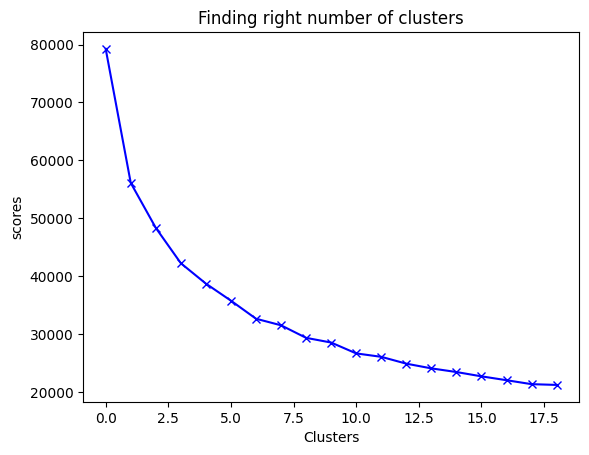

In [67]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

Display the graph, current and earlier wcss values   

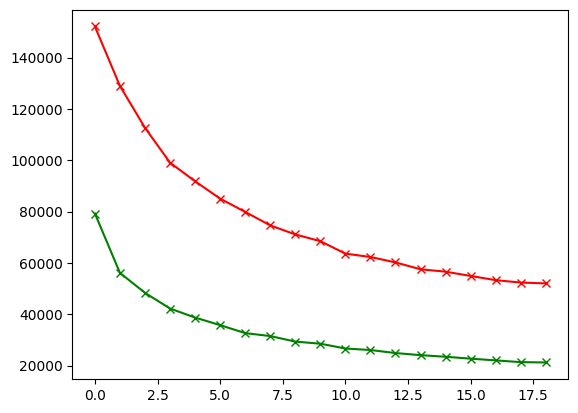

In [68]:
# Scores_1 – Earlier wcss values 
# Scores_2 – Current wcss values 
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

Create K Means Cluster with optimal number of clusters. In this case it is 4 clusters 

In [69]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

Display Cluster Details 

In [70]:
display(labels.shape) # Labels associated to each data point
display (labels.max())
display (labels.min())

(8950,)

3

0

Display individual cluster numbers 

In [71]:
y_kmeans = kmeans.fit_predict(pred)
display(y_kmeans)

array([3, 3, 3, ..., 2, 2, 2])

Concatenate Cluster number with Original Data Set 

In [72]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
display(df_cluster_dr.head())

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0   201.802084        139.509787          0.000000      12        1  
1  4103.032597       1072.340217          0.222222      12        1  
2   622.066742        627.284787          0.000000      12        1  
3     0.000000        864.206542          0.000000      12        1  
4   678.334763        244.791237          0.000000      12        1

Apply PCA on auto encoded data set 

In [73]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
display (pca_df.head())

pca1      pca2
0 -2.122130  0.065590
1 -0.203844 -1.023658
2 -1.028913  0.406165
3 -1.575889 -0.424091
4 -1.955709 -0.064391

Concatenate Cluster number with PCA Data Set 

In [75]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

pca1      pca2  cluster
0 -2.122130  0.065590        1
1 -0.203844 -1.023658        1
2 -1.028913  0.406165        1
3 -1.575889 -0.424091        1
4 -1.955709 -0.064391        1

Print Clusters and number records in each cluster 

In [76]:
pca_df.value_counts(pca_df.cluster)

cluster
1    5497
2    1940
0    1296
3     217
Name: count, dtype: int64

Plot Graph 

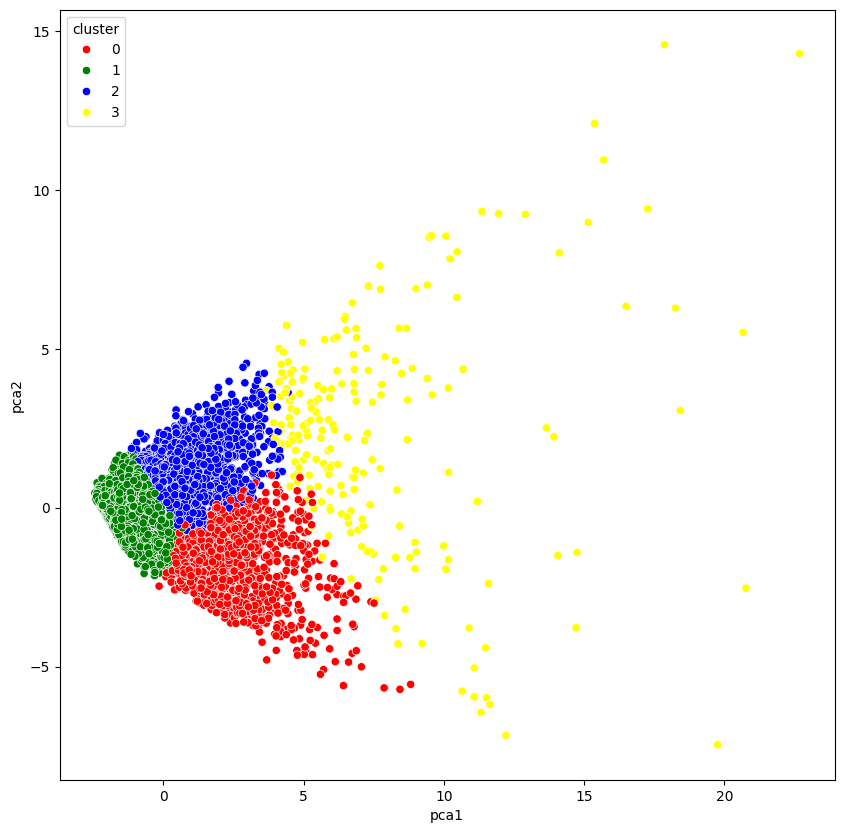

In [77]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()